<a href="https://colab.research.google.com/github/diagnoza/Call-Center-Sim/blob/master/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
from numpy import random
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

data_diabetes = pd.read_csv('diabetes.csv')
data_glass = pd.read_csv('glass.csv')




# **4.c**

**Dataset: diabetes**

In [229]:
Y = data_diabetes['class']
X = data_diabetes.drop(['class'],axis=1)
## One-level decision tree
print("*** Diabetes dataset ***")
print("**    One-level DT    **")
clf = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 10, max_depth = 1)

# Hold-out validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=random.randint(100))
clf = clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_train)
acc = accuracy_score(Y_train, Y_predict)
print("Training accuracy rate: %s" % acc)
Y_predict = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_predict)
print("Validation accuracy rate: %s" % acc)

## Multi-level decision tree
print("**    Multi-level DT    **")
clf = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 10, max_depth = None)

# Hold-out validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=random.randint(100))
clf = clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_train)
acc = accuracy_score(Y_train, Y_predict)
print("Training accuracy rate: %s" % acc)
Y_predict = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_predict)
print("Validation accuracy rate: %s" % acc)

*** Diabetes dataset ***
**    One-level DT    **
Training accuracy rate: 0.7509881422924901
Prediction accuracy rate: 0.7404580152671756
**    Multi-level DT    **
Training accuracy rate: 0.8537549407114624
Prediction accuracy rate: 0.7022900763358778


**Dataset: glass**

In [228]:
Y = data_glass['class']
X = data_glass.drop(['class'],axis=1)
## One-level decision tree
print("***  Glass  dataset  ***")
print("**    One-level DT    **")
clf = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 10, max_depth = 1)

# Hold-out validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=random.randint(100))
clf = clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_train)
acc = accuracy_score(Y_train, Y_predict)
print("Training accuracy rate: %s" % acc)
Y_predict = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_predict)
print("Validation accuracy rate: %s" % acc)

## Multi-level decision tree
print("**    Multi-level DT    **")
clf = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 10, max_depth = None)

# Hold-out validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=random.randint(100))
clf = clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_train)
acc = accuracy_score(Y_train, Y_predict)
print("Training accuracy rate: %s" % acc)
Y_predict = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_predict)
print("Validation accuracy rate: %s" % acc)

***  Glass  dataset  ***
**    One-level DT    **
Training accuracy rate: 0.46099290780141844
Prediction accuracy rate: 0.4246575342465753
**    Multi-level DT    **
Training accuracy rate: 0.7446808510638298
Prediction accuracy rate: 0.6301369863013698


**Difference in training/validation accuracy**  
The difference comes from the fact that the training part of the dataset is "known" to the model, hence accuracy measured on the training data is usually higher than the one measured on validation data.  

**One-level and multi-level decision trees**  
Multi-level decision trees are a more complex type of decision trees. They allow for representing a situation where events/attributes' order of occurance matters, or when one affect the other. Multi-level trees are also useful in decision-making - once displayed, one can easily see what leads to certain outcomes or what factors have impact on such.


# **4.d**

**Dataset: diabetes**

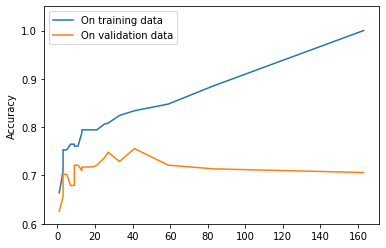

In [208]:
Y = data_diabetes['class']
X = data_diabetes.drop(['class'],axis=1)

len_diabetes = len(data_diabetes)
ns = np.append(np.arange(1,len_diabetes,5), len_diabetes)
tree_size = []
acc_train = []
acc = []
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=random.randint(100))
for n in ns:
  clf = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = n, max_depth = None)
  clf = clf.fit(X_train, Y_train)
  tree_size = np.append(tree_size, clf.tree_.node_count)

  Y_predict = clf.predict(X_train)
  acc_train = np.append(acc_train, accuracy_score(Y_train, Y_predict))

  Y_predict = clf.predict(X_test)
  acc = np.append(acc, accuracy_score(Y_test, Y_predict))
import matplotlib.pyplot as plt
plt.plot(tree_size, acc_train)
plt.plot(tree_size, acc)
plt.ylabel('Accuracy')
plt.ylim(0.60, 1.05)
plt.legend(['On training data', 'On validation data'])
plt.show()



Overfitting region:  30/40 - 160 nodes  
Underfitting region:  1 - 20 nodes  
Optimality: ~40 nodes  


**Dataset: glass**

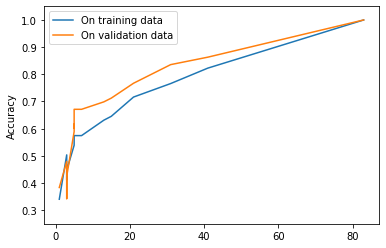

In [202]:
Y = data_glass['class']
X = data_glass.drop(['class'],axis=1)

len_glass = len(data_glass)
ns = np.append(np.arange(1,len_glass,5), len_glass)
tree_size = []
acc_train = []
acc = []
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=random.randint(100))
for n in ns:
  clf = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = n, max_depth = None)
  clf = clf.fit(X, Y)
  tree_size = np.append(tree_size, clf.tree_.node_count)

  Y_predict = clf.predict(X_train)
  acc_train = np.append(acc_train, accuracy_score(Y_train, Y_predict))

  Y_predict = clf.predict(X_test)
  acc = np.append(acc, accuracy_score(Y_test, Y_predict))

import matplotlib.pyplot as plt
plt.plot(tree_size, acc_train)
plt.plot(tree_size, acc)
plt.ylabel('Accuracy')
plt.ylim(0.25, 1.05)
plt.legend(['On training data', 'On validation data'])
plt.show()



Overfitting region: N/A  
Underfitting region: 1 - 5 nodes  
Optimality: 80 nodes (min_samples_leaf = len_glass)  
